# Statistical Significance ("Is it worth the complexity")

In [1]:
library(scmamp)

In [2]:
# read the results from the ablation analysis
df_lcbench = readRDS("../../ofaatime/analysis/lcbench_final_performance.rds")
df_rbv2 = readRDS("../../ofaatime/analysis/rbv2_super_final_performance.rds")
df_nb301 = readRDS("../../ofaatime/analysis/nb301_final_performance.rds")

In [3]:
df = rbind(df_lcbench, df_rbv2, df_nb301)

In [4]:
# read the results for 100 times full budget
df_lcbench = readRDS("../../ofaatime/analysis/lcbench_5200.rds")
df_rbv2 = readRDS("../../ofaatime/analysis/rbv2_super_100.rds")
df_nb301 = readRDS("../../ofaatime/analysis/nb301_9800.rds")

In [5]:
df_100 = rbind(df_lcbench, df_rbv2, df_nb301)

In [6]:
metadata = df[, c("task", "cfg")]
metadata = unique(metadata)

In [7]:
df_lcbench

task,id,repl,cfg,algorithm,eval_nr,budget,performance,ymin,ymax,nr,best,cumbudget,mcb
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
126025,a6391,1,lcbench,hpbster_bohb,449,17,0.1688692,0.1119697,0.4709049,0.15852314,0.03130618,5162,5162
126025,a6392,2,lcbench,hpbster_bohb,449,17,0.7128648,0.1119697,0.4709049,1.67410478,0.32898432,5162,5162
126025,a6393,3,lcbench,hpbster_bohb,449,17,0.5434676,0.1119697,0.4709049,1.20216095,0.35567655,5162,5162
126025,a6394,4,lcbench,hpbster_bohb,449,17,0.3266854,0.1119697,0.4709049,0.59820204,0.43752184,5162,5162
126025,a6395,5,lcbench,hpbster_bohb,449,17,0.6059694,0.1119697,0.4709049,1.37629206,0.07664367,5162,5162
126025,a6396,6,lcbench,hpbster_bohb,449,17,0.1871719,0.1119697,0.4709049,0.20951470,0.08190698,5162,5162
126025,a6397,7,lcbench,hpbster_bohb,449,17,0.1492010,0.1119697,0.4709049,0.10372724,0.02804943,5162,5162
126025,a6398,8,lcbench,hpbster_bohb,449,17,0.4944798,0.1119697,0.4709049,1.06568005,0.68166018,5162,5162
126025,a6399,9,lcbench,hpbster_bohb,449,17,0.3269722,0.1119697,0.4709049,0.59900091,0.09428046,5162,5162


## Complex vs. simple vs. no multifidelity at all 

TODO: Check which values we want to compare 

In [216]:
dfs = df[algorithm %in% c("rq1_1", "rq1_2", "rq4_2", "rq4_4")]

In [217]:
dfs = dfs[, mean(best), by = c("task", "algorithm")]

In [218]:
dfss = reshape2::recast(data = dfs[, c("algorithm", "V1", "task")], measure.var = "V1", formula = task ~ algorithm)

In [52]:
rownames(dfss) = dfss$task
dfss$task = NULL

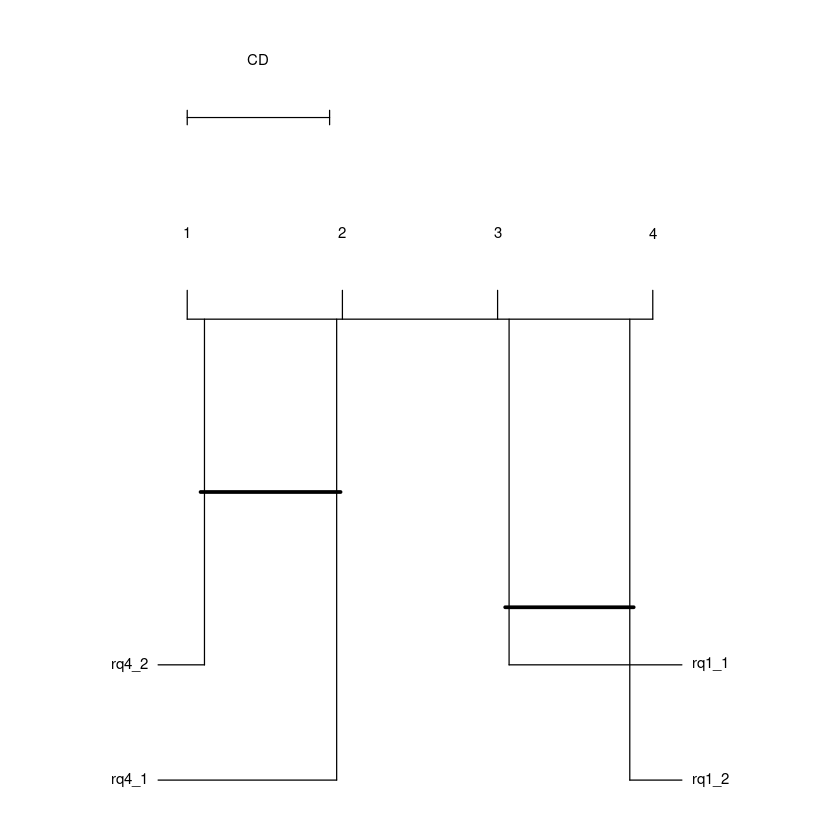

In [53]:
plotCD(results.matrix = dfss, alpha = 0.05)

### No Guidance, constant guidance, changing guidance

### Compared against baselines 

In [199]:
dff = rbind(
    df[algorithm %in% c("hpbster_bohb", "mlr3hyperband", "randomsearch_full_budget", "smac_full_budget")], 
    df[algorithm %in% c("rq1_1", "rq1_2") & cfg == "lcbench", ], 
    df[algorithm %in% c("rq1_3", "rq1_4") & cfg != "lcbench", ] # assuming nb301 is more similar to rbv2super
)

In [200]:
dff[algorithm == "rq1_1", ]$algorithm = "gamma*[HB]"
dff[algorithm == "rq1_2", ]$algorithm = "gamma*[EQUAL]"
dff[algorithm == "rq1_3", ]$algorithm = "gamma*[HB]"
dff[algorithm == "rq1_4", ]$algorithm = "gamma*[EQUAL]"

dff[algorithm == "hpbster_bohb", ]$algorithm = "BOHB"
dff[algorithm == "mlr3hyperband", ]$algorithm = "HB"
dff[algorithm == "randomsearch_full_budget", ]$algorithm = "RS"
dff[algorithm == "smac_full_budget", ]$algorithm = "SMAC"

In [201]:
dff_aggr = dff[, - mean(best), by = c("task", "algorithm")]

dff_aggr = reshape2::recast(data = dff_aggr[, c("algorithm", "V1", "task")], measure.var = "V1", formula = task ~ algorithm)

rownames(dff_aggr) = dff_aggr$task
dff_aggr$task = NULL

In [202]:
pdf("CD_RQ2_RQ3.pdf", width = 8, height = 2)
plotCD(dff_aggr, alpha = 0.01)
dev.off()

pdf("CD_RQ2_RQ3_lcbench.pdf", width = 7, height = 2)
plotCD(dff_aggr[rownames(dff_aggr) %in% metadata[cfg == "lcbench", ]$task, ], alpha = 0.01)
dev.off()

pdf("CD_RQ2_RQ3_rbv2.pdf", width = 7, height = 2)
plotCD(dff_aggr[rownames(dff_aggr) %in% metadata[cfg == "rbv2_super", ]$task, ], alpha = 0.01)
dev.off()

pdf("CD_RQ2_RQ3_nb301.pdf", width = 7, height = 2)
plotCD(dff_aggr[rownames(dff_aggr) %in% metadata[cfg == "nb301", ]$task, ], alpha = 0.01)
dev.off()

png 
  2

png 
  2

png 
  2

Warning message in qtukey(p = 1 - alpha, nmeans = num.alg, df = df):
“NaNs produced”


png 
  2

We can say two things: 
* In terms of final performance, it seems to make sense to thing about multifidelity (RQ4); for anytime performance, we should have a look at a different plot. 
* It does not matter two much about which batch sizes we use. However, other choices **do** make a big difference, and we are statistically significant. 
* SH does not have a statistically significant advantage 

In [8]:
dff_100 = rbind(
    df_100[algorithm %in% c("hpbster_bohb", "mlr3hyperband", "randomsearch_full_budget", "smac_full_budget")], 
    df_100[algorithm %in% c("rq1_1", "rq1_2") & cfg == "lcbench", ], 
    df_100[algorithm %in% c("rq1_3", "rq1_4") & cfg != "lcbench", ] # assuming nb301 is more similar to rbv2super
)

In [14]:
dff_100

task,id,repl,cfg,algorithm,eval_nr,budget,performance,ymin,ymax,nr,best,cumbudget,mcb
<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
126025,a6391,1,lcbench,BOHB,449,17,0.1688692,0.1119697,0.4709049,0.15852314,0.03130618,5162,5162
126025,a6392,2,lcbench,BOHB,449,17,0.7128648,0.1119697,0.4709049,1.67410478,0.32898432,5162,5162
126025,a6393,3,lcbench,BOHB,449,17,0.5434676,0.1119697,0.4709049,1.20216095,0.35567655,5162,5162
126025,a6394,4,lcbench,BOHB,449,17,0.3266854,0.1119697,0.4709049,0.59820204,0.43752184,5162,5162
126025,a6395,5,lcbench,BOHB,449,17,0.6059694,0.1119697,0.4709049,1.37629206,0.07664367,5162,5162
126025,a6396,6,lcbench,BOHB,449,17,0.1871719,0.1119697,0.4709049,0.20951470,0.08190698,5162,5162
126025,a6397,7,lcbench,BOHB,449,17,0.1492010,0.1119697,0.4709049,0.10372724,0.02804943,5162,5162
126025,a6398,8,lcbench,BOHB,449,17,0.4944798,0.1119697,0.4709049,1.06568005,0.68166018,5162,5162
126025,a6399,9,lcbench,BOHB,449,17,0.3269722,0.1119697,0.4709049,0.59900091,0.09428046,5162,5162


In [9]:
dff_100[algorithm == "rq1_1", ]$algorithm = "gamma*[HB]"
dff_100[algorithm == "rq1_2", ]$algorithm = "gamma*[EQUAL]"
dff_100[algorithm == "rq1_3", ]$algorithm = "gamma*[HB]"
dff_100[algorithm == "rq1_4", ]$algorithm = "gamma*[EQUAL]"
# dff_100[algorithm == "rq4_2", ]$algorithm = "gamma*[NO MF]"
# dff_100[algorithm == "rq4_4", ]$algorithm = "gamma*[NO MF]"


dff_100[algorithm == "hpbster_bohb", ]$algorithm = "BOHB"
dff_100[algorithm == "mlr3hyperband", ]$algorithm = "HB"
dff_100[algorithm == "randomsearch_full_budget", ]$algorithm = "RS"
dff_100[algorithm == "smac_full_budget", ]$algorithm = "SMAC"

In [11]:
dff_aggr_100 = dff_100[, - mean(best), by = c("task", "algorithm")]

dff_aggr_100 = reshape2::recast(data = dff_aggr_100[, c("algorithm", "V1", "task")], measure.var = "V1", formula = task ~ algorithm)

rownames(dff_aggr_100) = dff_aggr_100$task
dff_aggr_100$task = NULL

In [226]:
pdf("CD_RQ2_RQ3_100.pdf", width = 7, height = 2)
plotCD(dff_aggr_100, alpha = 0.01)
dev.off()

pdf("CD_RQ2_RQ3_lcbench_100.pdf", width = 7, height = 2)
plotCD(dff_aggr_100[rownames(dff_aggr_100) %in% metadata[cfg == "lcbench", ]$task, ], alpha = 0.01)
dev.off()

pdf("CD_RQ2_RQ3_rbv2_100.pdf", width = 7, height = 2)
plotCD(dff_aggr_100[rownames(dff_aggr_100) %in% metadata[cfg == "rbv2_super", ]$task, ], alpha = 0.01)
dev.off()

pdf("CD_RQ2_RQ3_nb301_100.pdf", width = 7, height = 2)
plotCD(dff_aggr_100[rownames(dff_aggr_100) %in% metadata[cfg == "nb301", ]$task, ], alpha = 0.01)
dev.off()

png 
  2

png 
  2

png 
  2

Warning message in qtukey(p = 1 - alpha, nmeans = num.alg, df = df):
“NaNs produced”


png 
  2